<a href="https://colab.research.google.com/github/haydenkirkeide/Data-Mining-Final-Project/blob/main/ANOVA_Synth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ANOVA: Grocery Spending by Costco Membership Status

Descriptive Statistics:
            count    mean    std     min     max
membership                                      
No             71   50.93  16.29   21.43   79.59
Yes           179  189.50  42.80  120.28  258.01

----------------------------------------------------------------------

ANOVA Results:
F-statistic (scipy):  702.4277
F-statistic (manual): 702.4277
P-value (scipy):      0.000000
P-value (manual):     0.000000

✓ Calculations match: True

Effect size (η²): 0.7391

----------------------------------------------------------------------

Detailed ANOVA Table:
Source                         SS     df           MS          F      P-value
----------------------------------------------------------------------
Between Groups          976117.84      1    976117.84   702.4277     0.000000
Within Groups           344629.36    248      1389.63
Total                  1320747.20    249
--------------------------------------------

/tmp/ipython-input-1990167999.py:130: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0].boxplot([no_membership, has_membership],



📊 Visualization saved as 'costco_membership_anova.png'


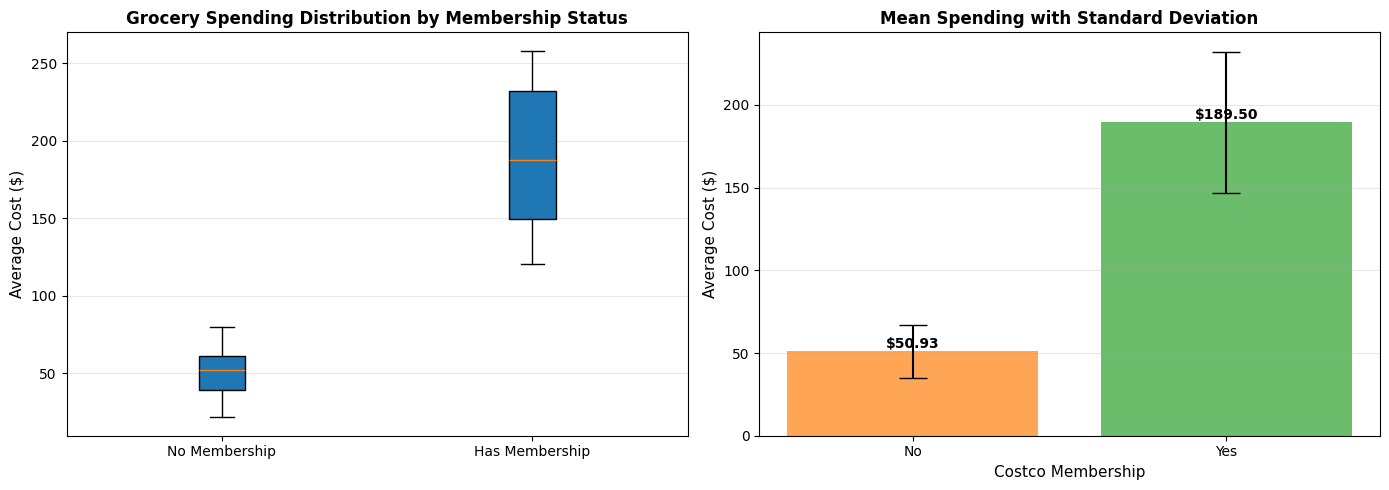


ANOVA Assumptions Check:

Normality Test (Shapiro-Wilk):
  Has Membership: p = 0.0000 (Not Normal)
  No Membership:  p = 0.0213 (Not Normal)

Homogeneity of Variance (Levene's Test):
  p = 0.0000 (Unequal variances)



In [ ]:
# Code adapted from: https://www.pythonfordatascience.org/anova-python/

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Load the survey data
survey_df = pd.read_csv('OPT SYNTH Standardized Preliminary Survey - Sheet1.csv')

# Clean the data - remove encoding issues in age column
survey_df['age'] = survey_df['age'].str.replace('â€"', '-')

# Convert avg_cost to numeric (remove $ and convert)
survey_df['avg_cost_numeric'] = survey_df['avg_cost'].str.replace('$', '').astype(float)

# Separate groups by membership status
has_membership = survey_df[survey_df['membership'] == 'Yes']['avg_cost_numeric']
no_membership = survey_df[survey_df['membership'] == 'No']['avg_cost_numeric']

# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(has_membership, no_membership)

# Calculate descriptive statistics
membership_stats = survey_df.groupby('membership')['avg_cost_numeric'].agg([
    ('count', 'count'),
    ('mean', 'mean'),
    ('std', 'std'),
    ('min', 'min'),
    ('max', 'max')
]).round(2)

# Calculate effect size (eta-squared)
grand_mean = survey_df['avg_cost_numeric'].mean()
ss_between = sum([len(survey_df[survey_df['membership'] == group]) *
                   (survey_df[survey_df['membership'] == group]['avg_cost_numeric'].mean() - grand_mean)**2
                   for group in ['Yes', 'No']])
ss_total = sum((survey_df['avg_cost_numeric'] - grand_mean)**2)
eta_squared = ss_between / ss_total

# Print results
print("=" * 70)
print("ANOVA: Grocery Spending by Costco Membership Status")
print("=" * 70)
print("\nDescriptive Statistics:")
print(membership_stats)
print("\n" + "-" * 70)
print("\nANOVA Results:")
print(f"F-statistic: {f_statistic:.4f}")
print(f"P-value: {p_value:.6f}")
print(f"Effect size (η²): {eta_squared:.4f}")
print("\n" + "-" * 70)

# Interpretation
alpha = 0.05
print("\nInterpretation:")
if p_value < alpha:
    print(f"✓ SIGNIFICANT: p-value ({p_value:.6f}) < {alpha}")
    print("  There IS a statistically significant difference in average spending")
    print("  between students with and without Costco memberships.")

    diff = membership_stats.loc['Yes', 'mean'] - membership_stats.loc['No', 'mean']
    print(f"\n  Students WITH membership spend ${abs(diff):.2f} {'more' if diff > 0 else 'less'} on average")
    print(f"  than those WITHOUT membership.")
else:
    print(f"✗ NOT SIGNIFICANT: p-value ({p_value:.6f}) ≥ {alpha}")
    print("  There is NO statistically significant difference in average spending")
    print("  between the two groups.")

# Effect size interpretation
print(f"\nEffect Size Interpretation:")
if eta_squared < 0.01:
    effect = "negligible"
elif eta_squared < 0.06:
    effect = "small"
elif eta_squared < 0.14:
    effect = "medium"
else:
    effect = "large"
print(f"  η² = {eta_squared:.4f} indicates a {effect} effect size")
print("  (proportion of variance explained by membership status)")